In [324]:
import pandas as pd
import matplotlib.pyplot as plt

In [325]:
def plot_dynamics(dynamics, mode):
    assert mode in ('region', 'all'), 'Incorrect mode!'

    fig, ax1 = plt.subplots(figsize=(10, 6))

    styles = ['k--', 'k-']
    regions = dynamics['Регион']

    if mode == 'all':
        ax1.plot(dynamics.columns[1:], dynamics.iloc[0, 1:].values, styles[0], label=regions[0])
        ax1.set_ylabel('Значение для ' + regions[0], color='k')

    ax1.tick_params(axis='y', labelcolor='k')
    ax1.set_xlabel('Год')
    ax1.grid()

    ax2 = ax1.twinx()
    ax2.plot(dynamics.columns[1:], dynamics.iloc[1, 1:].values, styles[1], label=regions[1])
    ax2.set_ylabel('Значение для ' + regions[1], color='k')
    ax2.tick_params(axis='y', labelcolor='k')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

    plt.tight_layout()
    plt.show()

### 1. Динамика ВРП региона и РФ:

In [326]:
dynamics = pd.read_excel('ВРП.xlsx', engine='openpyxl')

In [327]:
dynamics

,Регион,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Российская Федерация,5753671.6,7170968.2,8741219.2,10742423.3,13964305.4,18034385.2,22492119.6,27963955.6,33908756.7,...,49926068.7,54103000.3,59188270.3,65750633.6,74120174.8,79745093.9,90202901.5,95060662.3,94410215.3,121182987.5
1,г. Москва,1159034.0,1370182.8,1767476.7,2188231.5,2853272.4,4135154.6,5260232.8,6696259.1,8248652.0,...,10666870.5,11814897.4,12779525.7,13520862.9,15121534.2,16538189.5,18777726.0,19797064.3,20260717.7,24471160.4


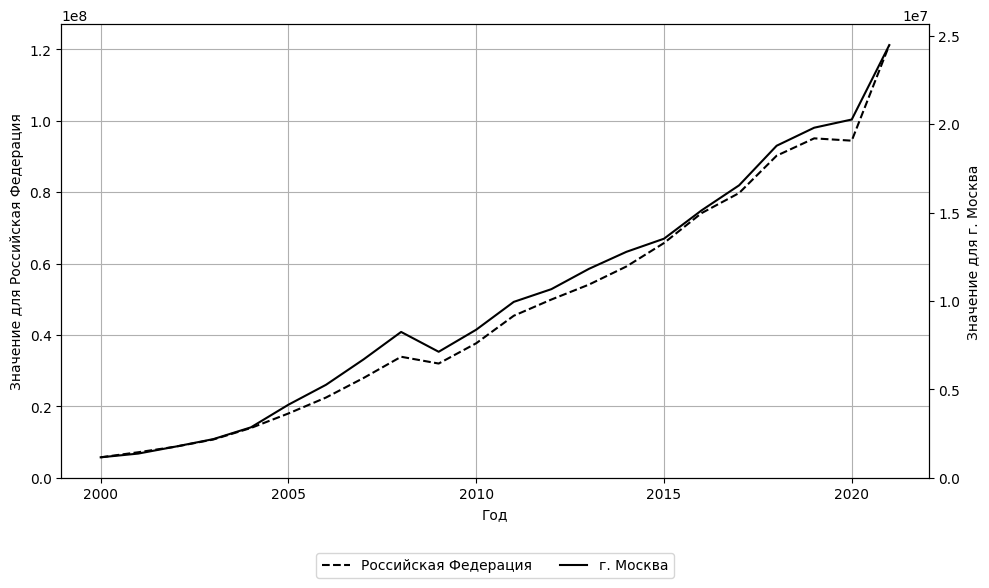

In [328]:
plot_dynamics(dynamics=dynamics, mode='all')

### 2. Динамика темпа прироста ВРП региона и РФ:

In [329]:
dynamics = pd.read_excel('ВРП.xlsx', engine='openpyxl')

In [330]:
growth_rates = dynamics.set_index('Регион').pct_change(axis=1).mul(100).reset_index()
growth_rates = growth_rates.drop(columns=dynamics.columns[1])

growth_rates

,Регион,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Российская Федерация,24.632907,21.897336,22.893878,29.992135,29.146310,24.717973,24.327792,21.258799,-5.607780,...,9.988025,8.366234,9.399238,11.087270,12.729218,7.588918,13.114045,5.385371,-0.684244,28.357919
1,г. Москва,18.217654,28.995686,23.805394,30.391707,44.926737,27.207645,27.299672,23.182987,-13.598338,...,7.217953,10.762547,8.164508,5.800976,11.838529,9.368463,13.541606,5.428444,2.342031,20.781311


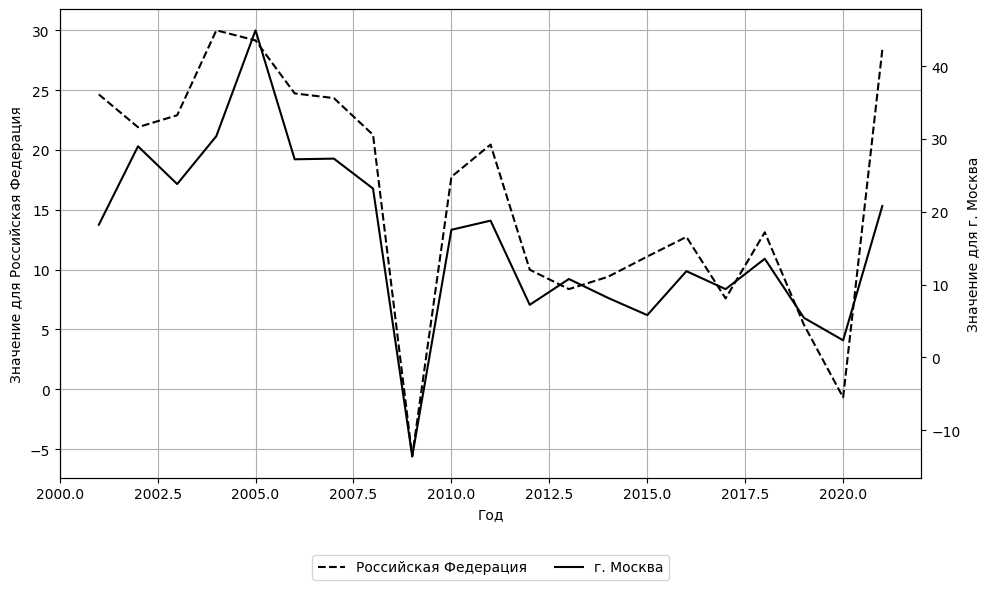

In [331]:
plot_dynamics(dynamics=growth_rates, mode='all')

### 3. Динамика доли ВРП региона в совокупном ВРП России:

In [332]:
dynamics = pd.read_excel('ВРП.xlsx', engine='openpyxl')

In [333]:
rf_vrp_values = dynamics.set_index('Регион').loc['Российская Федерация']
result_dynamics = dynamics.copy()
result_dynamics.iloc[:, 1:] = (dynamics.iloc[:, 1:].div(rf_vrp_values, axis=1) * 100)

result_dynamics

,Регион,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Российская Федерация,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,г. Москва,20.14425,19.107361,20.220025,20.369999,20.432612,22.92928,23.387004,23.946037,24.326023,...,21.365332,21.837786,21.591315,20.563852,20.401374,20.738818,20.817208,20.825717,21.460302,20.193561


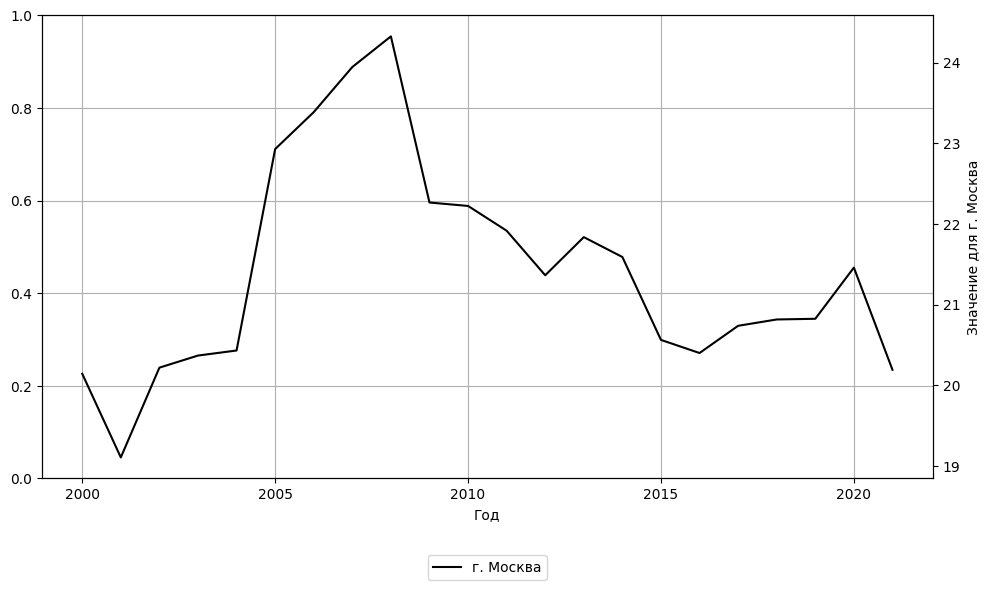

In [334]:
plot_dynamics(dynamics=result_dynamics, mode='region')

### 4. Динамика ВРП на душу населения региона и РФ:

In [335]:
dynamics = pd.read_excel('ВРПд.xlsx', engine='openpyxl')

In [336]:
dynamics

,Регион,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Российская Федерация,39532.3,49474.8,60611.4,74840.5,97691.9,125658.7,157233,195819.0,237552.2,...,348641.5,377006.0,405147.7,449097.9,505337.7,543065.9,614333.2,647708.1,644615.2,830792.7
1,г. Москва,115630.5,134435.8,171127.8,209174.1,268390.3,381997.1,477873,601146.9,734242.0,...,895017.9,980986.6,1051559.6,1102496.4,1223881.1,1329055.5,1494938.0,1565396.3,1599543.2,1935204.5


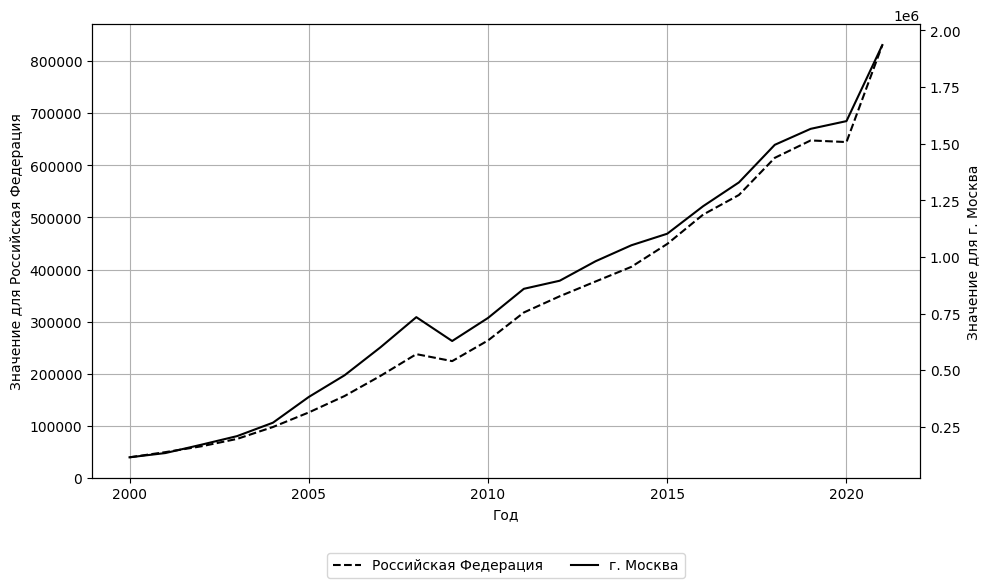

In [337]:
plot_dynamics(dynamics=dynamics, mode='all')

### 5. Динамика отношения ВРП на душу населения региона к среднероссийскому уровню:

In [338]:
dynamics = pd.read_excel('ВРПд.xlsx', engine='openpyxl')

In [339]:
rf_vrpd_values = dynamics.set_index('Регион').loc['Российская Федерация']
result_dynamics = dynamics.copy()
result_dynamics.iloc[:, 1:] = (dynamics.iloc[:, 1:].div(rf_vrpd_values, axis=1) * 100)

result_dynamics

,Регион,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Российская Федерация,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,г. Москва,292.496263,271.725808,282.335996,279.493189,274.731375,303.995744,303.926657,306.991099,309.086592,...,256.715824,260.204506,259.54969,245.491328,242.190737,244.731901,243.343189,241.682372,248.139231,232.934702


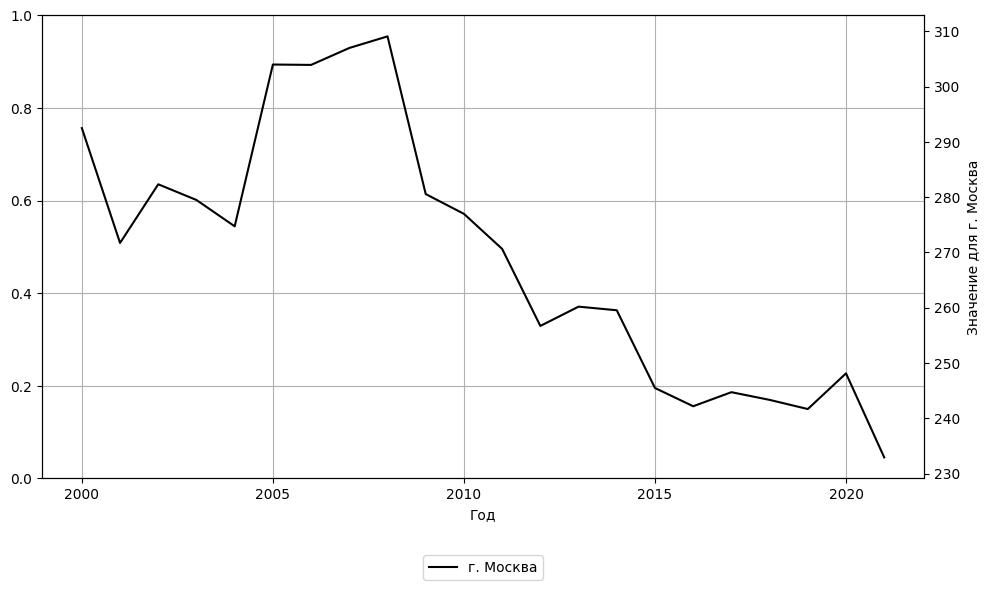

In [340]:
plot_dynamics(dynamics=result_dynamics, mode='region')

### 6. Динамика индекса потребительских цен РФ и региона:

In [341]:
dynamics = pd.read_excel('ИПЦ.xlsx', engine='openpyxl')

In [342]:
dynamics

,Регион,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Российская Федерация,120.18,118.58,115.06,111.99,111.73,110.92,109.00,111.87,113.28,...,106.47,111.35,112.91,105.39,102.51,104.26,103.04,104.91,108.39,111.94
1,г. Москва,122.10,120.36,117.19,110.43,111.54,110.37,109.04,110.21,112.30,...,106.21,111.65,114.16,106.17,103.82,104.25,103.35,103.78,107.06,111.70


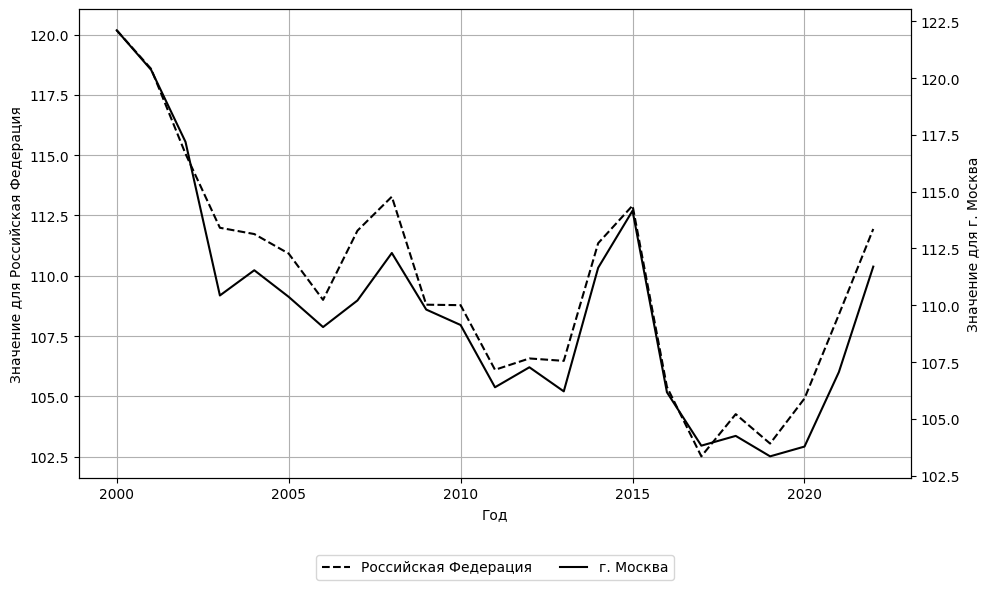

In [343]:
plot_dynamics(dynamics=dynamics, mode='all')

### 7. Темпы прироста ВРП в сопоставимых ценах в РФ и в регионе:

In [344]:
dynamics = pd.read_excel('ВРП.xlsx', engine='openpyxl')
cpi = pd.read_excel('ИПЦ.xlsx', engine='openpyxl')

In [345]:
cpi = cpi.drop(columns=cpi.columns[-1])

cpi_normalized = cpi.copy()
for index, row in cpi.iterrows():
    base_value = row.iloc[1]
    cpi_normalized.iloc[index, 1:] = (row.iloc[1:] / base_value) * 100

real_vrp_values = dynamics.copy()
for index, row in dynamics.iterrows():
    corresponding_cpi = cpi_normalized.loc[cpi_normalized['Регион'] == row['Регион']]
    real_vrp_values.iloc[index, 1:] = (row.iloc[1:] / corresponding_cpi.iloc[0, 1:]) * 100

growth_rates = real_vrp_values.set_index('Регион').pct_change(axis=1).mul(100).reset_index()
growth_rates = growth_rates.drop(columns=real_vrp_values.columns[1])

growth_rates

,Регион,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Российская Федерация,26.314579,25.626509,26.262788,30.294632,30.089409,26.914840,21.138190,19.749487,-1.721042,...,9.502951,8.468015,4.604732,9.552453,20.772900,10.611609,11.215430,6.633140,-2.454528,24.236823
1,г. Москва,19.926683,32.485031,31.384173,29.094102,46.463063,28.759243,25.948246,20.890446,-11.639135,...,6.338380,11.867982,2.894334,3.474763,20.255124,11.844054,13.073281,6.346543,1.917989,17.080931


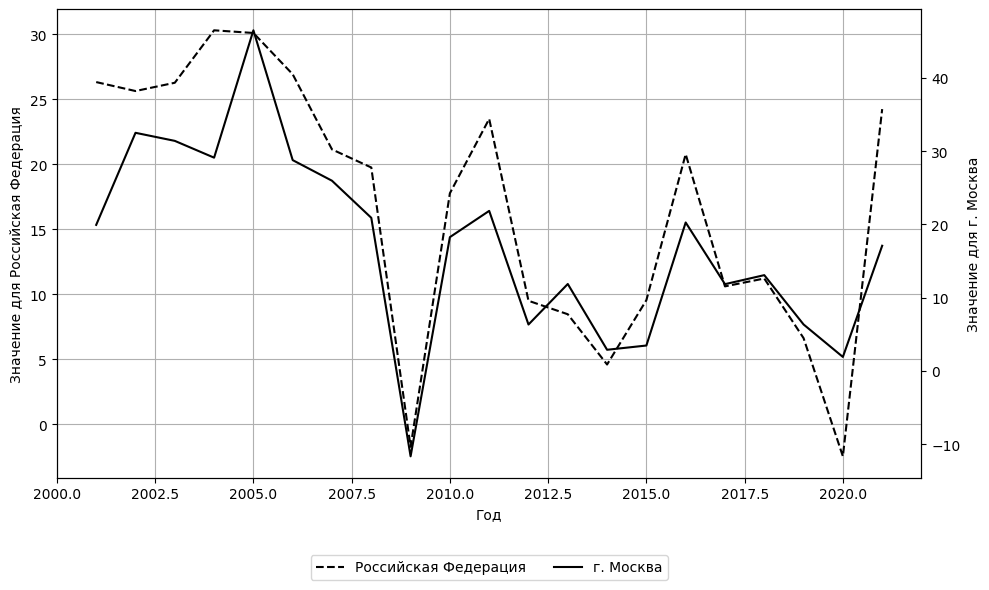

In [346]:
plot_dynamics(dynamics=growth_rates, mode='all')

### 8. Темпы прироста ВРП на душу населения в сопоставимых ценах в РФ и в регионе:

In [347]:
dynamics = pd.read_excel('ВРПд.xlsx', engine='openpyxl')
cpi = pd.read_excel('ИПЦ.xlsx', engine='openpyxl')

In [348]:
cpi = cpi.drop(columns=cpi.columns[-1])

cpi_normalized = cpi.copy()
for index, row in cpi.iterrows():
    base_value = row.iloc[1]
    cpi_normalized.iloc[index, 1:] = (row.iloc[1:] / base_value) * 100

real_vrp_values = dynamics.copy()
for index, row in dynamics.iterrows():
    corresponding_cpi = cpi_normalized.loc[cpi_normalized['Регион'] == row['Регион']]
    real_vrp_values.iloc[index, 1:] = (row.iloc[1:] / corresponding_cpi.iloc[0, 1:]) * 100

growth_rates = real_vrp_values.set_index('Регион').pct_change(axis=1).mul(100).reset_index()
growth_rates = growth_rates.drop(columns=real_vrp_values.columns[1])

growth_rates

/var/folders/kn/r0ftxf756wv_cwx_10kl3pqh0000gn/T/ipykernel_2730/3173649927.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '173360.20128440365' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  real_vrp_values.iloc[index, 1:] = (row.iloc[1:] / corresponding_cpi.iloc[0, 1:]) * 100


,Регион,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Российская Федерация,26.838973,26.257546,26.860813,30.837224,29.566863,27.331103,21.345587,19.802154,-1.750624,...,9.318797,8.237286,2.754807,9.316435,20.551794,10.485174,11.224373,6.681033,-2.251483,24.744039
1,г. Москва,17.944045,30.736621,29.715186,27.032644,43.837739,26.624466,24.460906,19.867061,-12.400594,...,3.295545,10.699135,1.971193,2.538758,19.364227,11.051565,12.017281,5.624996,1.757982,17.278207


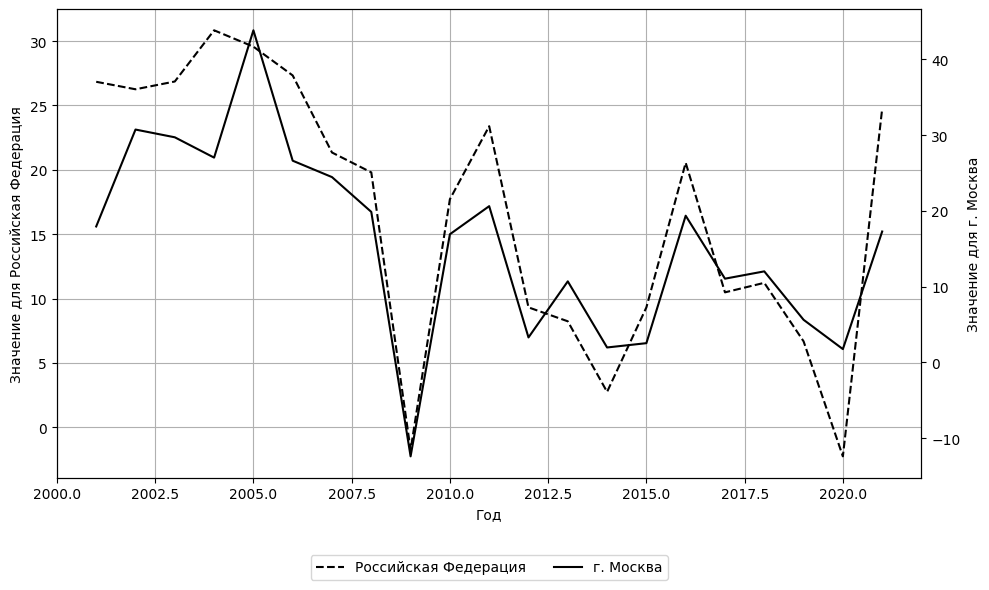

In [349]:
plot_dynamics(dynamics=growth_rates, mode='all')